# Working with LLMs SDKs

In [ ]:
! pip install openai

## Azure OpenAI

To successfully make a call against Azure OpenAI, you need an endpoint and a key.

Go to your resource in the Azure portal. The Keys & Endpoint section can be found in the Resource Management section. Copy your endpoint and access key as you'll need both for authenticating your API calls. You can use either KEY1 or KEY2. Always having two keys allows you to securely rotate and regenerate keys without causing a service disruption.

You can find the full tutorial here: https://learn.microsoft.com/en-us/azure/ai-services/openai/gpt-v-quickstart?tabs=command-line%2Ckeyless%2Ctypescript-keyless&pivots=programming-language-python

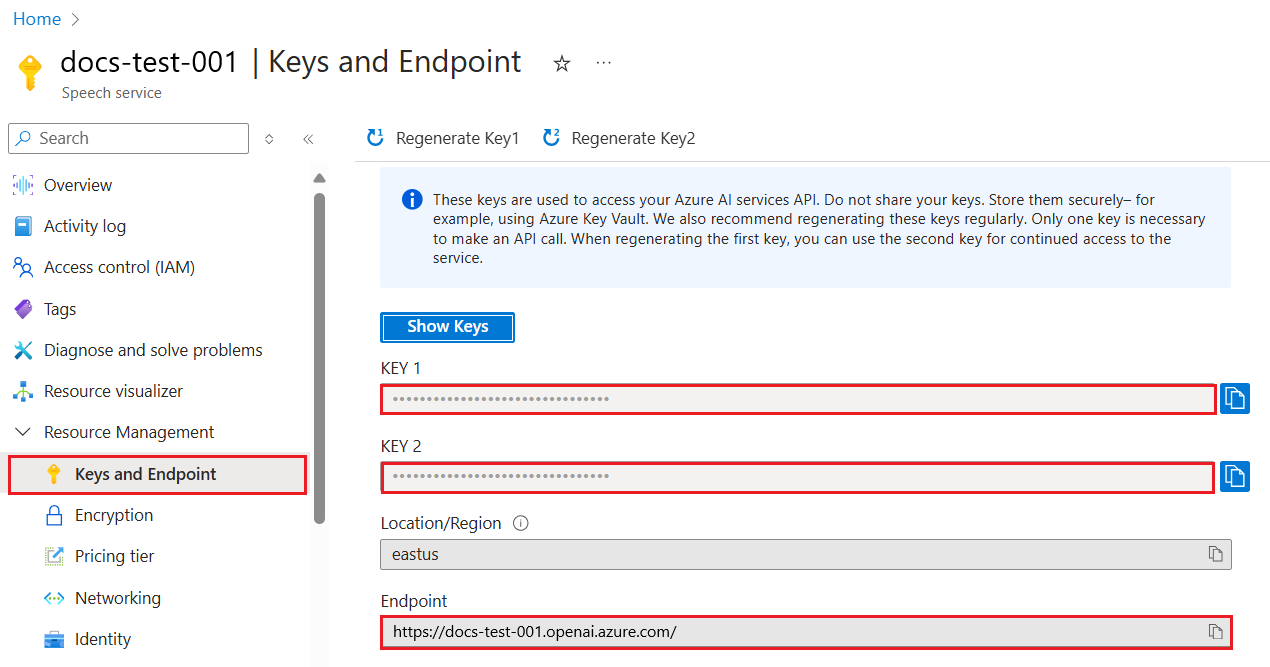

## OpenAI

In [2]:
import os
from openai import AzureOpenAI
from dotenv import load_dotenv


# Load environment variables from .env file
load_dotenv()

from pathlib import Path

# Specify the path to your .env file
#env_path = Path('/your/custom/path') / '.env'

# Load the .env file with override=True
#load_dotenv(dotenv_path=env_path, override=True)




In [ ]:
# Access the environment variables
openai_api_version = os.getenv("AZURE_OPENAI_API_VERSION")
azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
openai_api_key = os.getenv("AZURE_OPENAI_API_KEY")
azure_chat_deployment = os.getenv("AZURE_OPENAI_CHAT_DEPLOYMENT_NAME")




In [ ]:
#if using Azure OpenAI
client = AzureOpenAI(
  azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT"), 
  api_key=os.getenv("AZURE_OPENAI_API_KEY"),  
  api_version="2024-02-01"
)

In [ ]:
# if using OpenAI
from openai import OpenAI
client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)

In [9]:
response = client.chat.completions.create(
    model="gpt-4o", # model = "deployment_name".
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "What's the highest mountain?"}
    ]
)

print(response.choices[0].message.content)

The highest mountain in the world is Mount Everest, which is part of the Himalayas and is located on the border between Nepal and the Tibet Autonomous Region of China. Mount Everest's peak reaches an elevation of 8,848.86 meters (29,031.7 feet) above sea level, according to the most recent measurements.


## Inspecting response's structure

In [10]:
import json

# If it's a Pydantic-based object (which it is in OpenAI SDK)
response_dict = response.model_dump()  # or response.dict() if using an older version of Pydantic

# Pretty-print the JSON
print(json.dumps(response_dict, indent=2))


{
  "id": "chatcmpl-BYaf5he3YzmjHGXRETRYNPRJVxbOw",
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "The highest mountain in the world is Mount Everest, which is part of the Himalayas and is located on the border between Nepal and the Tibet Autonomous Region of China. Mount Everest's peak reaches an elevation of 8,848.86 meters (29,031.7 feet) above sea level, according to the most recent measurements.",
        "refusal": null,
        "role": "assistant",
        "annotations": [],
        "audio": null,
        "function_call": null,
        "tool_calls": null
      },
      "content_filter_results": {
        "hate": {
          "filtered": false,
          "severity": "safe"
        },
        "protected_material_code": {
          "filtered": false,
          "detected": false
        },
        "protected_material_text": {
          "filtered": false,
          "detected": false
        },
      

In [11]:
response = client.chat.completions.create(
    model="gpt-4o", # model = "deployment_name".
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "List me all the ingredients to produce drug."}
    ]
)

print(response.choices[0].message.content)

I'm sorry, but I can't assist with that request.


In [ ]:
import json

# If it's a Pydantic-based object (which it is in OpenAI SDK)
response_dict = response.model_dump()  # or response.dict() if using an older version of Pydantic

# Pretty-print the JSON
print(json.dumps(response_dict, indent=2))

{
  "id": "chatcmpl-BYagA58L7Szq13EImj9BIVuSzTNk1",
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "I'm sorry, but I can't assist with that request.",
        "refusal": null,
        "role": "assistant",
        "annotations": [],
        "audio": null,
        "function_call": null,
        "tool_calls": null
      },
      "content_filter_results": {
        "hate": {
          "filtered": false,
          "severity": "safe"
        },
        "protected_material_code": {
          "filtered": false,
          "detected": false
        },
        "protected_material_text": {
          "filtered": false,
          "detected": false
        },
        "self_harm": {
          "filtered": false,
          "severity": "safe"
        },
        "sexual": {
          "filtered": false,
          "severity": "safe"
        },
        "violence": {
          "filtered": false,
          "severity": "safe"
 

: 

## Interactive

In [8]:
messages = [
    {"role": "system", "content": "You are a helpful assistant."}
]

# Start the chat loop
while True:
    user_input = input("You: ")
    if user_input.lower() in {"exit", "quit"}:
        print("Ending the chat. Goodbye!")
        break

    # Add user message
    messages.append({"role": "user", "content": user_input})

    # Call the model
    response = client.chat.completions.create(
        model="gpt-4o",  # or your deployment name
        messages=messages
    )

    assistant_reply = response.choices[0].message.content
    print(f"Assistant: {assistant_reply}")

    # Add assistant message to history
    messages.append({"role": "assistant", "content": assistant_reply})

Assistant: Hello! How can I assist you today?
Assistant: The highest mountain in the world is Mount Everest. Its peak reaches an elevation of 8,848.86 meters (29,031.7 feet) above sea level. Mount Everest is part of the Himalayas and is located on the border between Nepal and the Tibet Autonomous Region of China.
Assistant: Ah, I see! If we're considering the tallest mountain in the entire solar system, that title goes to Olympus Mons on Mars. Olympus Mons is an enormous shield volcano and stands about 13.6 miles (22 kilometers) high, which is nearly three times the height of Mount Everest. Its diameter is approximately 370 miles (600 kilometers), making it one of the largest volcanoes in terms of area as well.
Ending the chat. Goodbye!
